In [1]:
from dateutil.parser import parse # for parse email
import nltk.data # for splitting to sentences
import os
import os.path # walk through directories
import email.parser 
import re # for searching sentences
import pickle

from collections import defaultdict # for bucketing

In [2]:
class Conversation(object):
    def __init__(self, name1, name2):
        self.name1 = name1
        self.name2 = name2
        self.msgs = []
        
    def __init__(self, name1, name2, msg, date):
        self.name1 = name1
        self.name2 = name2
        self.msgs = [(msg,parse(date))]
    
    def get_names_set(self):
        return set([self.name1, self.name2])
    
    def add_message(self, msg, date):
        self.msgs.append((msg,parse(date)))
        
    def get_names(self):
        return (self.name1, self.name2)

    def show(self):
        print (self.name1, self.name2 , self.msgs)
        
    def sort_messages(self):
        self.msgs = sorted(self.msgs, key=lambda x: x[1])

In [3]:
def are_in_list_conversation(conversation, name1, name2):
    for x in range(0,len(conversation)):
        if set([name1, name2]) == set([conversation[x].name1, conversation[x].name2]):
            return x, True
        
    return -1, False

In [4]:
conversation = pickle.load(open("../data/enron_conversation_whole.plk", "rb"))

In [6]:
conversation[0].msgs

[(['Here is our forecast'],
  datetime.datetime(2001, 5, 14, 16, 39, tzinfo=tzoffset('PDT', -25200))),
 (['Tim,\n Matt sent you a email with his attempt to organize some of the cems and wscc \ndata.',
   'Tim H. expressed concern over the reliability of the wscc data.',
   "I \ndon't know if we should scrap the wscc or just keep monitoring in case it \nimproves.",
   'Let me know what you think.',
   'Phillip'],
  datetime.datetime(2000, 7, 6, 9, 38, tzinfo=tzoffset('PDT', -25200))),
 (['---------------------- Forwarded by Phillip K Allen/HOU/ECT on 05/19/2000 \n10:46 AM ---------------------------\n   \n\t\n\t\n\tFrom:  Jeffrey A Shankman                           05/18/2000 06:27 PM\n\t\n\nTo: Phillip K Allen/HOU/ECT@ECT, Keith Holst/HOU/ECT@ect, Mike \nGrigsby/HOU/ECT@ECT\ncc:  \nSubject: Large Deal Alert\n\n\n---------------------- Forwarded by Jeffrey A Shankman/HOU/ECT on 05/18/2000 \n08:23 PM ---------------------------\n\n\nBruce Sukaly@ENRON\n05/18/2000 08:20 AM\nTo: John Arno

In [6]:
pattern = r"[a-zA-Z0-9 ]*(what|where|when|why|who|how)[a-zA-Z0-9.!? ]*"
pattern2 = r"[a-zA-Z0-9.!? ]*\?"


short_msg_or_question = []

for _conversation in conversation:                              # conversation[X]
    _conversation.sort_messages() 
    for msg_converstion in _conversation.msgs:                  # conversation[X].msgs[Y]
        for msg in msg_converstion[0]: # tuple ([msgs], date)   # conversation[X].msgs[Y][0][Z]
            if len(msg.split(" ")) > 11:
                continue
            if re.match(pattern, msg, re.I) or re.match(pattern2, msg, re.I):
                short_msg_or_question.append(msg)
        

In [7]:
len (short_msg_or_question)

293663

In [8]:
len(set(short_msg_or_question))

56661

In [11]:
set_short_msg_or_question = list(set(short_msg_or_question))

In [12]:
set_short_msg_or_question[:10]

['5.?',
 'Is that possible?',
 'Your description of coffee is how you interpret SEX.',
 'See it.?',
 'How are the various structures of transmission organizations working?',
 'Is Brent our man?',
 'Look at how you glorify God.',
 'Do you know your plans yet?',
 'Can we clean this language up a little?',
 'Did you respond to the Haas address?']

In [17]:
with open("../data/enron_sentences.txt" , mode="w+") as f:
    for line in set_short_msg_or_question:
        f.write(line.strip() + "\n")

In [57]:
tuples = []
x = 0
pattern3 = r"^[0-9a-zA-Z.,]*$"

short_msg_or_question = list(set(short_msg_or_question))

while x < (len(short_msg_or_question) - 1):
    if re.match(pattern, short_msg_or_question[x], re.I) or re.match(pattern2, short_msg_or_question[x], re.I):
        y = x + 1
        while re.match(pattern3, short_msg_or_question[y], re.I):
            if y >= (len(short_msg_or_question) - 1):
                break
            y += 1
        tuples.append([short_msg_or_question[x], short_msg_or_question[y]])
        x = y
    x += 1

In [58]:
len(tuples)

51978

In [56]:
tuples[:10]

[['Did I miss you sometime this weekend?', 'Whenever.'],
 ['Q?contest with golfing supersta=\nr Tiger Woods!', 'Chow.'],
 ["Hope this gives you an idea on where we're at.", 'Whatever.'],
 ['Whats up?', 'WHY.'],
 ['What day is here birthday?', 'Howdy.'],
 ['High Egos?', 'Why'],
 ['Let me see where those guys are at.', 'However.'],
 ["What is the financial extent of Enron's claim?", 'Wholesale.'],
 ['Vacation???', 'where.'],
 ["However, it's going a lot better this time.", 'whatever....']]

In [188]:
set(questions[:100])

{'?',
 'Are you open to more discussions?',
 'Can you help?',
 'Can you take a look and get back to me with the bullish case?',
 'Check 1406  Walmart    Description and unit?',
 'Check 1410  Crumps     Detail description and unit?',
 'Check 1411  Lucy      What is this?',
 'Check 1415  Papes      Detail description and units?',
 'Check 1438    Walmart?',
 'Description and unit?',
 'Do you have additional comments or changes?',
 'Do you have any comments?',
 'Flying somewhere takes too much time.',
 'For what its worth........',
 'Have you run it by Phillip Allen?',
 'How is progress on creating the \nspreadsheets.',
 'I base this belief in large part on what I heard at a luncheon I attended yesterday afternoon at which the keynote speaker was FERC Chairman Curt Hebert.',
 'Is there the potential for a surprise announcement of some sort of fixed price gas or power cap once the open meeting finally happens?',
 'Let me know what you think.',
 'My suggestion for where to go is Austin.',
 '

In [121]:
def get_num_words(x):
    return len(nltk.word_tokenize(x))

bucketed_sentences = partition(set(questions), lambda x: 0 if get_num_words(x) < 5 
                                  else 1 if get_num_words(x) < 10 
                                  else 2 if get_num_words(x) < 20 
                                  else 3 if get_num_words(x) < 30
                                  else 4)

In [126]:
bucketed_sentences

defaultdict(list,
            {0: ['raincheck?',
              'Anymore details?',
              'How about 3:30',
              'resumes of whom?',
              'How are you ?'],
             1: ['Can you fax me the rent roll?',
              'Why are his requests coming to me?',
              'Any word on the release agreement?',
              '8500?????',
              'How is your racing going?',
              'What did mary write?',
              'is this still an issue?',
              'can you fill it in yourself?',
              'Are we going to inspect tomorrow?',
              'Why is the body shop being closed?',
              'What are my choices for dates?',
              'Have you heard anything from Bank One today?',
              'Can you send me a schedule of meetings?',
              'What is GIS info?',
              'What are your skills?',
              'here is the file I showed you.'],
             2: ['What are the specifics of those bonds are they insured what

In [143]:
buckets = []
for x in range(len(bucketed_sentences)):
    print(len(bucketed_sentences[x]))
    buckets.append(len(bucketed_sentences[x]))

5
16
11
1
1


In [184]:
pickle.dump(questions,open("./data/enron_unique_questions.plk", "wb"))

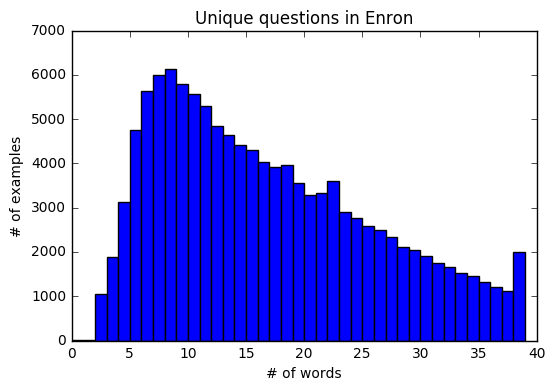

In [193]:
import matplotlib.pyplot as plt

histogram = [get_num_words(x) for x in set(questions)]
# more than 40 words will be deal like OTHER
histogram = [x if x < 40 else 40 for x in histogram]

plt.hist(histogram, bins=range(0, 40, 1))
plt.title("Unique questions in Enron")
plt.xlabel("# of words")
plt.ylabel("# of examples")

plt.show()

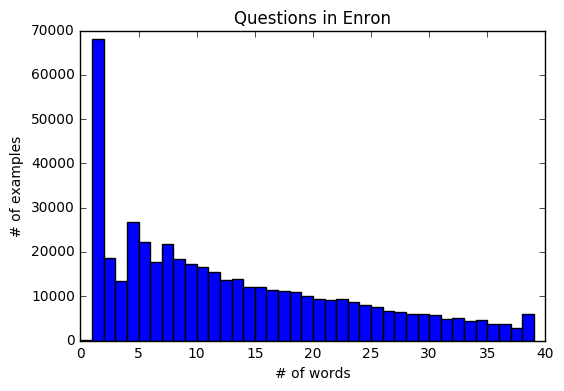

In [195]:
import matplotlib.pyplot as plt

histogram2 = [get_num_words(x) for x in questions]
histogram2 = [x if x < 40 else 40 for x in histogram2]

plt.hist(histogram2, bins=range(0, 40, 1))
plt.title("Questions in Enron")
plt.xlabel("# of words")
plt.ylabel("# of examples")

plt.show()